In [ ]:
!kaggle datasets download -d sshikamaru/car-object-detection


Dataset URL: https://www.kaggle.com/datasets/sshikamaru/car-object-detection
License(s): other
 76% 85.0M/112M [00:00<00:00, 302MB/s]
100% 112M/112M [00:00<00:00, 301MB/s] 


In [ ]:
import zipfile

with zipfile.ZipFile("car-object-detection.zip", 'r') as zip_ref:
    zip_ref.extractall("car-dataset")


In [ ]:
!kaggle datasets download -d sshikamaru/car-object-detection


Dataset URL: https://www.kaggle.com/datasets/sshikamaru/car-object-detection
License(s): other
 99% 111M/112M [00:01<00:00, 123MB/s] 
100% 112M/112M [00:01<00:00, 105MB/s]


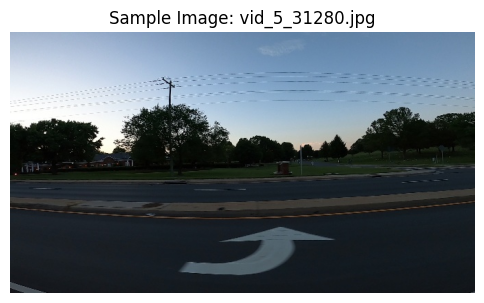

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Path to images folder (adjust if needed)
images_folder = "/content/car-dataset/data/testing_images"

# Ensure the dataset path exists
if not os.path.exists(images_folder):
    print(f"Error: The folder '{images_folder}' does not exist. Check your dataset path.")
else:
    # Get list of image files
    image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.png'))]

    if not image_files:
        print("No image files found in the folder.")
    else:
        # Show a random image
        random_image = random.choice(image_files)
        image_path = os.path.join(images_folder, random_image)

        # Load and display the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        plt.figure(figsize=(6,6))
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Sample Image: {random_image}")
        plt.show()


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
import torch

# Load YOLOv5 model using Torch Hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Check if model is loaded
print("YOLOv5 model loaded successfully!")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-4 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


YOLOv5 model loaded successfully!


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-4 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


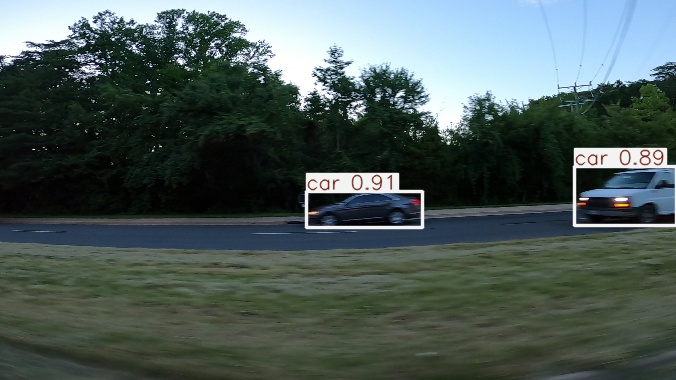

In [ ]:
import cv2
import torch
from matplotlib import pyplot as plt

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load an image
image_path = "/content/car-dataset/data/testing_images/vid_5_26700.jpg"  # Change this to an image from your dataset
img = cv2.imread(image_path)

# Convert BGR to RGB (because OpenCV loads images in BGR format)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run inference
results = model(img)

# Show results
results.show()


✅ Label files created in: /content/dataset/data/training_labels/


vid_5_26560.txt
vid_5_26580.txt
vid_5_26600.txt
vid_5_26620.txt
vid_5_26640.txt
vid_5_26660.txt
vid_5_26680.txt
vid_5_26700.txt
vid_5_26720.txt
vid_5_26740.txt


In [ ]:
!cat /content/dataset/data/training_labels/vid_5_26560.txt


0 0.5 0.5 1.0 1.0
0 0.5 0.5 1.0 1.0


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to plot bounding boxes
def plot_bounding_box(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read label file
    with open(label_path, "r") as f:
        lines = f.readlines()

    # Image dimensions (assumed 1x1 since we normalized)
    img_h, img_w = 1, 1

    # Draw bounding boxes
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())

        # Convert normalized values to image scale
        x_min = int((x_center - width / 2) * img_w)
        y_min = int((y_center - height / 2) * img_h)
        x_max = int((x_center + width / 2) * img_w)
        y_max = int((y_center + height / 2) * img_h)

        # Draw rectangle
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Test with one image
image_path = "/content/dataset/data/training_images/vid_5_26560.jpg"
label_path = "/content/dataset/data/training_labels/vid_5_26560.txt"
plot_bounding_box(image_path, label_path)


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import glob

image_folder = "/content/dataset/data/training_images"
all_images = glob.glob(image_folder + "/*.jpg")

print(f"🖼️ Total images found: {len(all_images)}")
print(all_images[:10])  # Show first 10 images


🖼️ Total images found: 1001
['/content/dataset/data/training_images/vid_4_6480.jpg', '/content/dataset/data/training_images/vid_4_1640.jpg', '/content/dataset/data/training_images/vid_4_880.jpg', '/content/dataset/data/training_images/vid_4_13660.jpg', '/content/dataset/data/training_images/vid_4_18360.jpg', '/content/dataset/data/training_images/vid_4_10740.jpg', '/content/dataset/data/training_images/vid_4_13740.jpg', '/content/dataset/data/training_images/vid_4_4080.jpg', '/content/dataset/data/training_images/vid_4_23440.jpg', '/content/dataset/data/training_images/vid_4_11320.jpg']


In [ ]:
import os

image_folder = "/content/dataset/data/training_images"
label_folder = "/content/dataset/data/training_labels"

# Get list of all images and labels
image_files = {os.path.basename(f).replace(".jpg", "") for f in glob.glob(image_folder + "/*.jpg")}
label_files = {os.path.basename(f).replace(".txt", "") for f in glob.glob(label_folder + "/*.txt")}

# Find common files
matching_files = image_files & label_files
print(f"✅ Matching image-label pairs: {len(matching_files)}")

# Find missing ones
missing_images = label_files - image_files
missing_labels = image_files - label_files

print(f"❌ Missing Images: {len(missing_images)} -> {missing_images}")
print(f"❌ Missing Labels: {len(missing_labels)} -> {missing_labels}")


✅ Matching image-label pairs: 0
❌ Missing Images: 83 -> {'vid_5_26600', 'vid_5_28440', 'vid_5_30840', 'vid_5_30920', 'vid_5_26920', 'vid_5_27640', 'vid_5_29480', 'vid_5_27300', 'vid_5_29820', 'vid_5_27520', 'vid_5_26620', 'vid_5_27500', 'vid_5_29440', 'vid_5_27580', 'vid_5_31560', 'vid_5_31620', 'vid_5_26760', 'vid_5_26560', 'vid_5_30760', 'vid_5_26640', 'vid_5_27620', 'vid_5_26900', 'vid_5_31700', 'vid_5_27920', 'vid_5_26740', 'vid_5_27840', 'vid_5_26580', 'vid_5_27420', 'vid_5_31720', 'vid_5_27440', 'vid_5_28260', 'vid_5_31040', 'vid_5_26960', 'vid_5_27900', 'vid_5_27560', 'vid_5_26820', 'vid_5_29420', 'vid_5_27860', 'vid_5_26940', 'vid_5_31140', 'vid_5_28540', 'vid_5_29580', 'vid_5_30940', 'vid_5_27880', 'vid_5_29760', 'vid_5_28420', 'vid_5_26780', 'vid_5_29540', 'vid_5_30740', 'vid_5_31120', 'vid_5_31600', 'vid_5_31160', 'vid_5_27540', 'vid_5_27240', 'vid_5_29460', 'vid_5_26720', 'vid_5_27460', 'vid_5_29400', 'vid_5_26840', 'vid_5_28520', 'vid_5_27360', 'vid_5_30640', 'vid_5_27380'